In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [3]:
data =  pd.read_csv("./mobile-price-classification/train.csv")

In [4]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
bestFeatures = SelectKBest(score_func=chi2, k = 10)

In [13]:
fit = bestFeatures.fit(X, y)

In [19]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [20]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [24]:
scores = pd.concat([df_columns, df_scores], axis=1)

In [25]:
scores.columns = ['feature', 'score']

In [78]:
tenF1 = scores.sort_values(by='score', ascending=False).head(10)['feature'].values

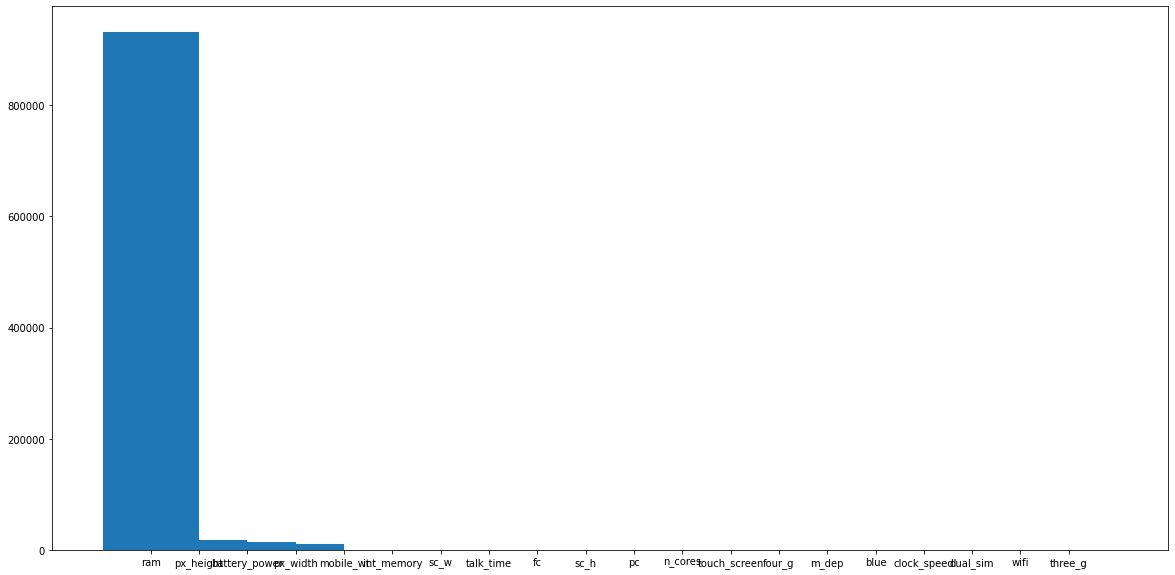

In [38]:
plt.figure(figsize=(20, 10))
plt.bar(scores['feature'], scores['score'], width=2)
plt.show()

<span style="font-size:50px;">Tree Based Method</span>

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()
fit = model.fit(X, y)

In [44]:
fit.feature_importances_

array([0.07715757, 0.00641824, 0.02656594, 0.00659271, 0.02352441,
       0.00632133, 0.03534892, 0.02447923, 0.0384296 , 0.0208991 ,
       0.02852604, 0.0576335 , 0.05537992, 0.49573206, 0.02572987,
       0.02577947, 0.02787699, 0.00548525, 0.00618176, 0.00593808])

In [48]:
imp = pd.DataFrame(fit.feature_importances_, index=X.columns, columns=['Imp'])

In [83]:
tenF2 = imp.sort_values(by="Imp", ascending = False).head(10).index.values

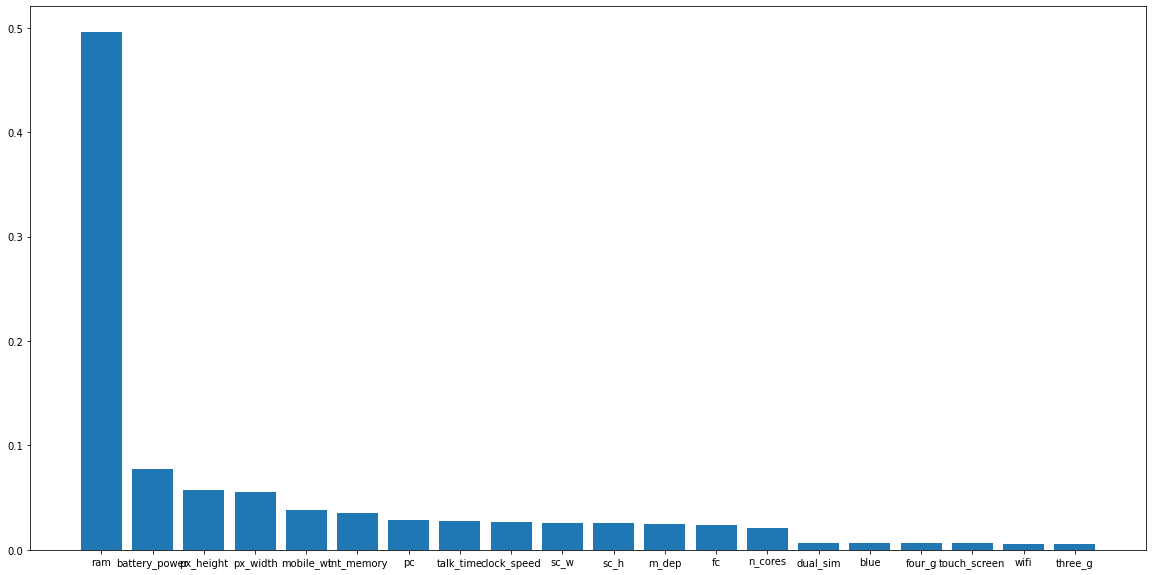

In [53]:
plt.figure(figsize=(20, 10))
plt.bar(imp.index, imp['Imp'])
plt.show()

<span style="font-size:50px;">Correlation Matrix</span>

In [55]:
import seaborn as sns

In [56]:
data_corr = data.corr()

In [103]:
tenF3 = data_corr['price_range'].sort_values(ascending = False).index[1:11]

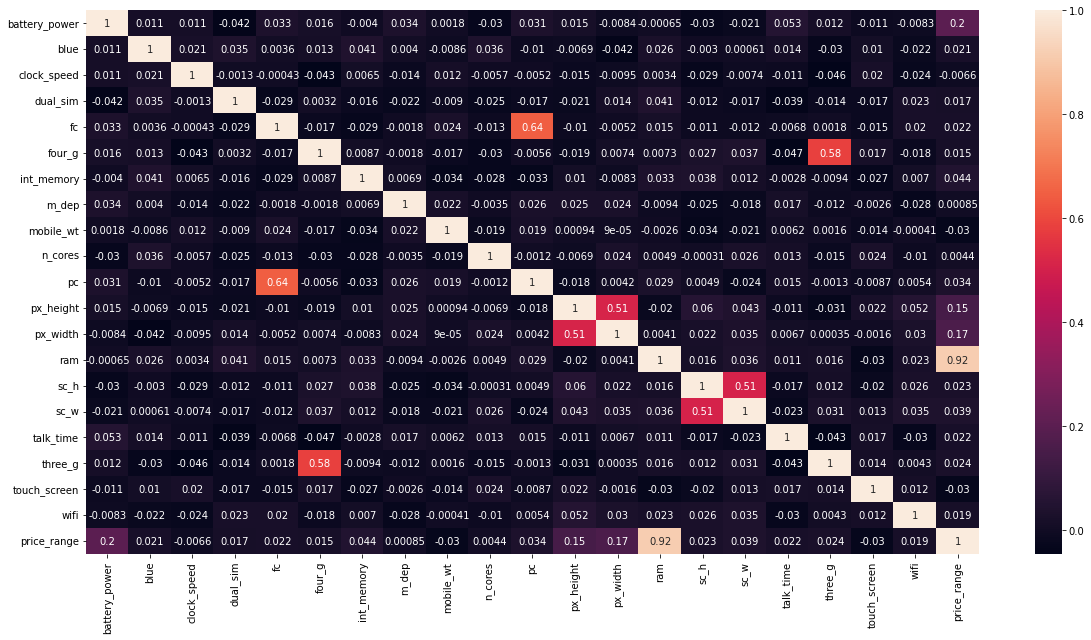

In [61]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr, annot = True)
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score

In [64]:
rfc = RandomForestClassifier()

In [65]:
sc = cross_val_score(rfc, X, y, cv = 10)

In [66]:
sc.mean()

0.8835

In [104]:
sc1 = cross_val_score(rfc, X[tenF1], y, cv = 10)
sc2 = cross_val_score(rfc, X[tenF2], y, cv = 10)
sc3 = cross_val_score(rfc, X[tenF3], y, cv = 10)

In [105]:
print(sc1.mean())
print(sc2.mean())
print(sc3.mean())

0.9040000000000001
0.8985
0.908


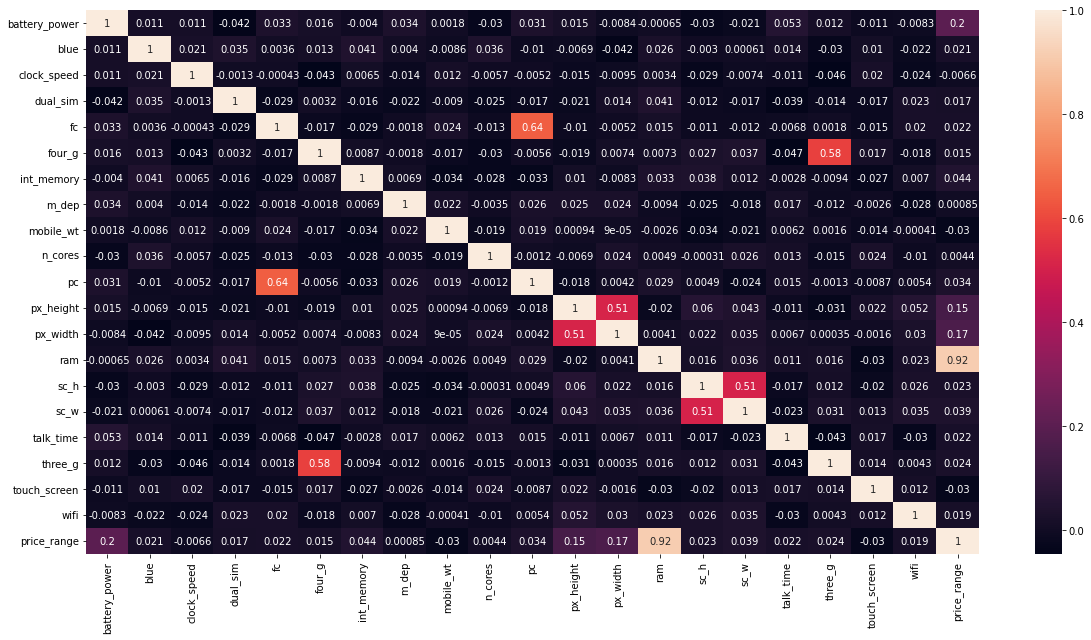

In [109]:
import seaborn as sns 
data_corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr, annot = True)
plt.show()